In [1]:
import sys
import os
import json
import numpy as np
import pandas as pd
import requests
import io
import xarray as xr
import calendar
from shapely.geometry import shape
import geopandas as gpd
from pystac_client import Client as StacClient
from dask.distributed import Client, LocalCluster
import stackstac
import warnings
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:

cluster = LocalCluster(
    n_workers=4,             
    threads_per_worker=1,    
    memory_limit="6GB"       
)
client = Client(cluster)
cluster    


LocalCluster(a935a295, 'tcp://127.0.0.1:46509', workers=4, threads=4, memory=22.35 GiB)

In [3]:
# Add the folder containing WQI_utils.py
sys.path.append(os.path.abspath("../utils"))

## 2 Import the main functions
# Import functions from your utils
from WQI_utils import compute_wqi_indices
from wrapper_plots_utils import (
    plot_wqi_time_series, 
    plot_wqi_seasonal, 
    plot_wqi_seasons, 
    plot_wqi_pie_charts  
)

In [4]:
os.makedirs("outputs", exist_ok=True)

In [5]:
HB_BAY = (-82.47, 27.75, -82.30, 28.00)
# TBEP_TRIAL_BBOX = (-82.55, 27.75, -82.45, 27.85)

start_date = "2019-12-01"
end_date = "2024-12-31"

In [7]:
df_full, df_roll_full, monthly_full, stack = compute_wqi_indices(
    bbox=HB_BAY,
    start_date=start_date,
    end_date=end_date,
    max_items=100,           
    filter_clouds=True
)
print("Full Hillsborough_Bay results shape:", df_full.shape)
print("Stack ready for maps!")

Cloud filtered: 100 → 26 scenes (<20.0% cloud cover)

=== FULL DATA QUALITY DIAGNOSTICS (First 5 Scenes) ===

SCENE 1: 2024-12-23 | ID: S2B_17RL...
Thumbnail: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/17/R/LL/2024/12/S2B_17RLL_20241223_0_L2A/thumbnail.jpg
Cloud cover (metadata): 0.066426%


/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


SCL breakdown: Clouds=0.0% | Water=26.2% | Valid=4,542,575px
Raw NDWI: -0.398 | Green: 735.820 | NIR: 1707.666
--------------------------------------------------------------------------------

SCENE 2: 2024-12-18 | ID: S2A_17RL...
Thumbnail: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/17/R/LL/2024/12/S2A_17RLL_20241218_0_L2A/thumbnail.jpg
Cloud cover (metadata): 17.235643%
SCL breakdown: Clouds=15.8% | Water=22.8% | Valid=4,542,575px
Raw NDWI: -0.299 | Green: 997.263 | NIR: 1849.840
--------------------------------------------------------------------------------

SCENE 3: 2024-12-13 | ID: S2B_17RL...
Thumbnail: https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/17/R/LL/2024/12/S2B_17RLL_20241213_0_L2A/thumbnail.jpg
Cloud cover (metadata): 0.126712%
SCL breakdown: Clouds=0.3% | Water=25.9% | Valid=4,542,575px
Raw NDWI: -0.424 | Green: 729.714 | NIR: 1804.105
--------------------------------------------------------------------------------

SCE

In [8]:
print("Full HB_BAY results shape:", df_full.shape)
print(df_full.head())
print("\nColumns:", df_full.columns.tolist())
print("\nRolling shape:", df_roll_full.shape)
print(monthly_full.round(3))


Full HB_BAY results shape: (26, 7)
                         ndwi_mean  ndwi_median  ndti_mean  ndti_median  \
date                                                                      
2024-05-02 16:15:35.287  -0.194069    -0.221041   0.021358     0.041636   
2024-05-02 16:15:49.847   0.048418    -0.089864  -0.082810    -0.007561   
2024-05-07 16:15:33.233  -0.160223    -0.218122   0.004262     0.037275   
2024-05-07 16:15:47.787   0.054049    -0.036212  -0.083883    -0.034412   
2024-05-22 16:15:31.815  -0.182302    -0.223051   0.015619     0.034221   

                         ndci_mean  ndci_median  month  
date                                                    
2024-05-02 16:15:35.287   0.091592     0.079776      5  
2024-05-02 16:15:49.847   0.052065     0.034981      5  
2024-05-07 16:15:33.233   0.087862     0.075260      5  
2024-05-07 16:15:47.787   0.047591     0.023084      5  
2024-05-22 16:15:31.815   0.088907     0.077663      5  

Columns: ['ndwi_mean', 'ndwi_median', '

In [9]:
df_full.to_csv("HB_BAY_results.csv")
df_roll_full.to_csv("HB_BAY_rolling.csv")
monthly_full.to_csv("HB_BAY_monthly.csv")

print("Saved processed outputs")

Saved processed outputs


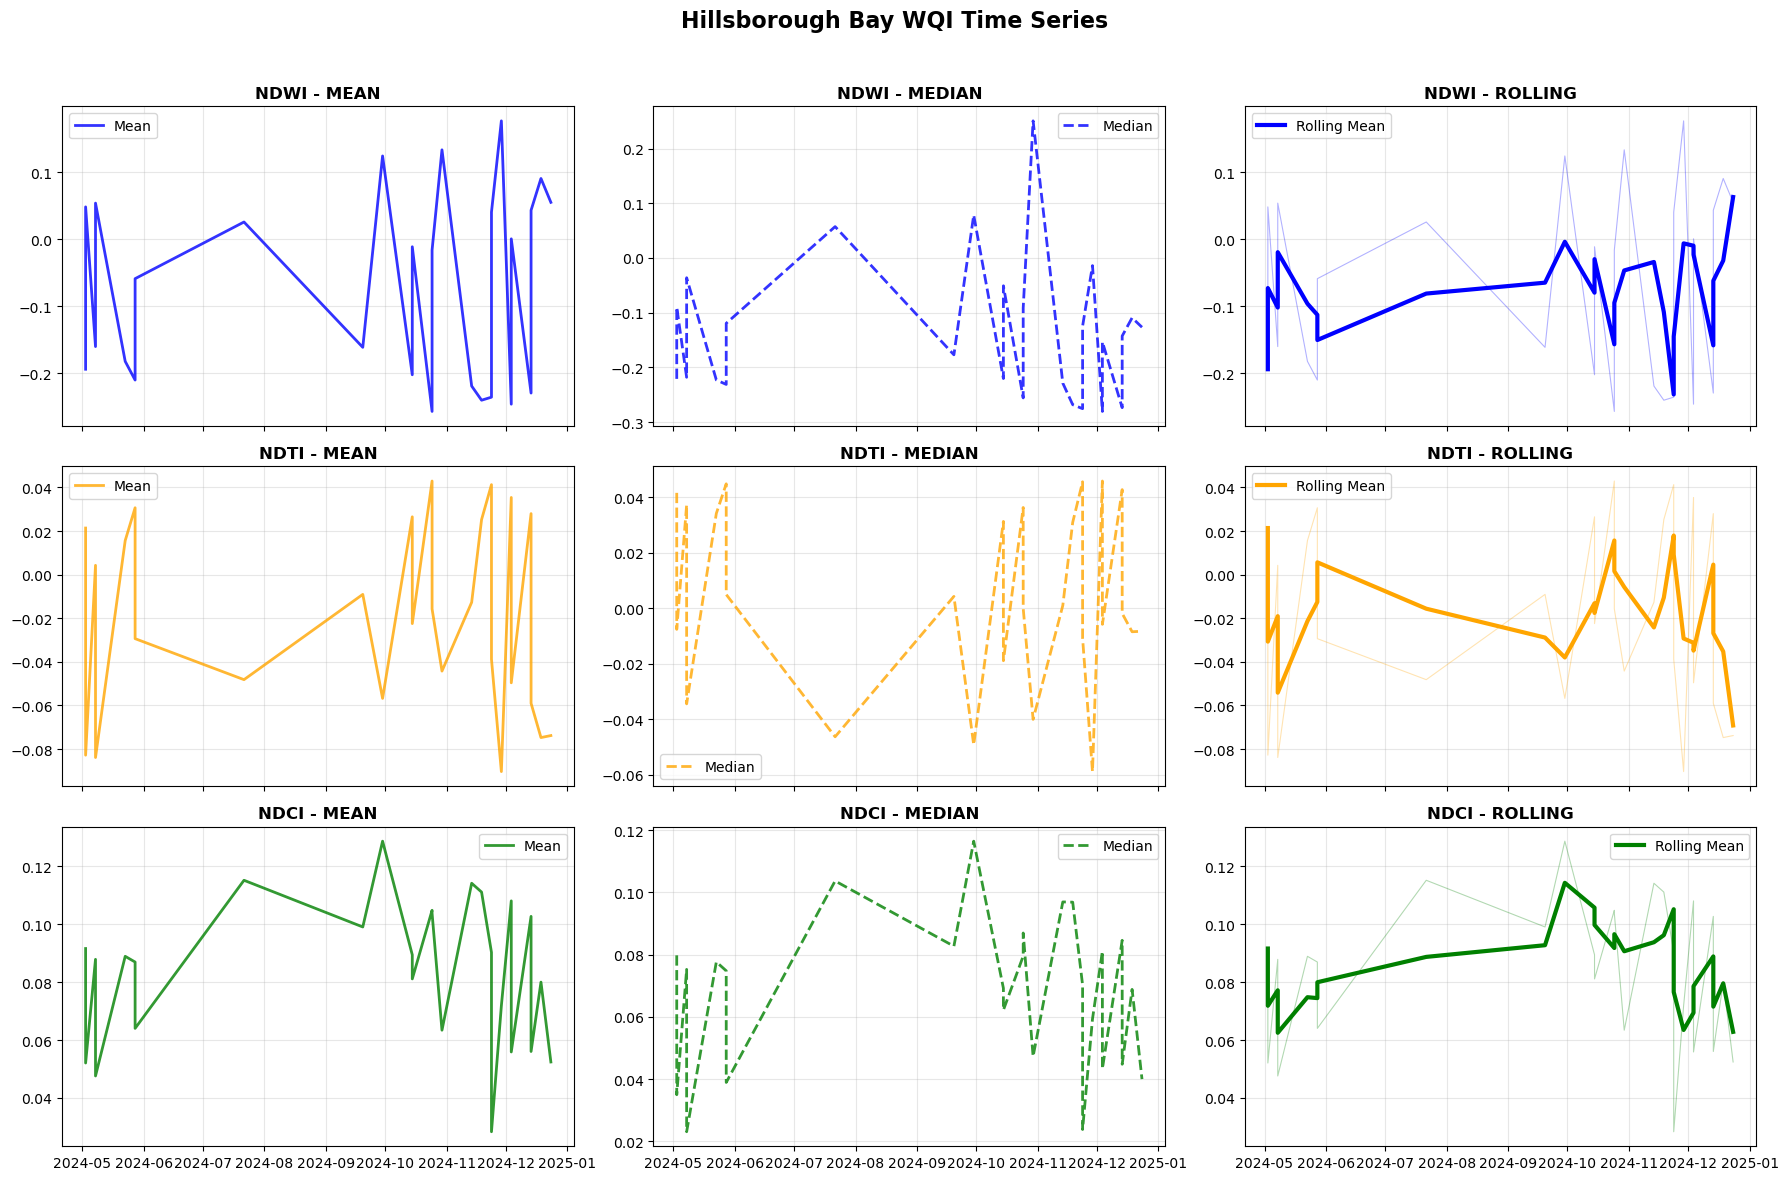

In [11]:
plot_wqi_time_series(df_full, df_roll_full, title="Hillsborough Bay WQI Time Series")

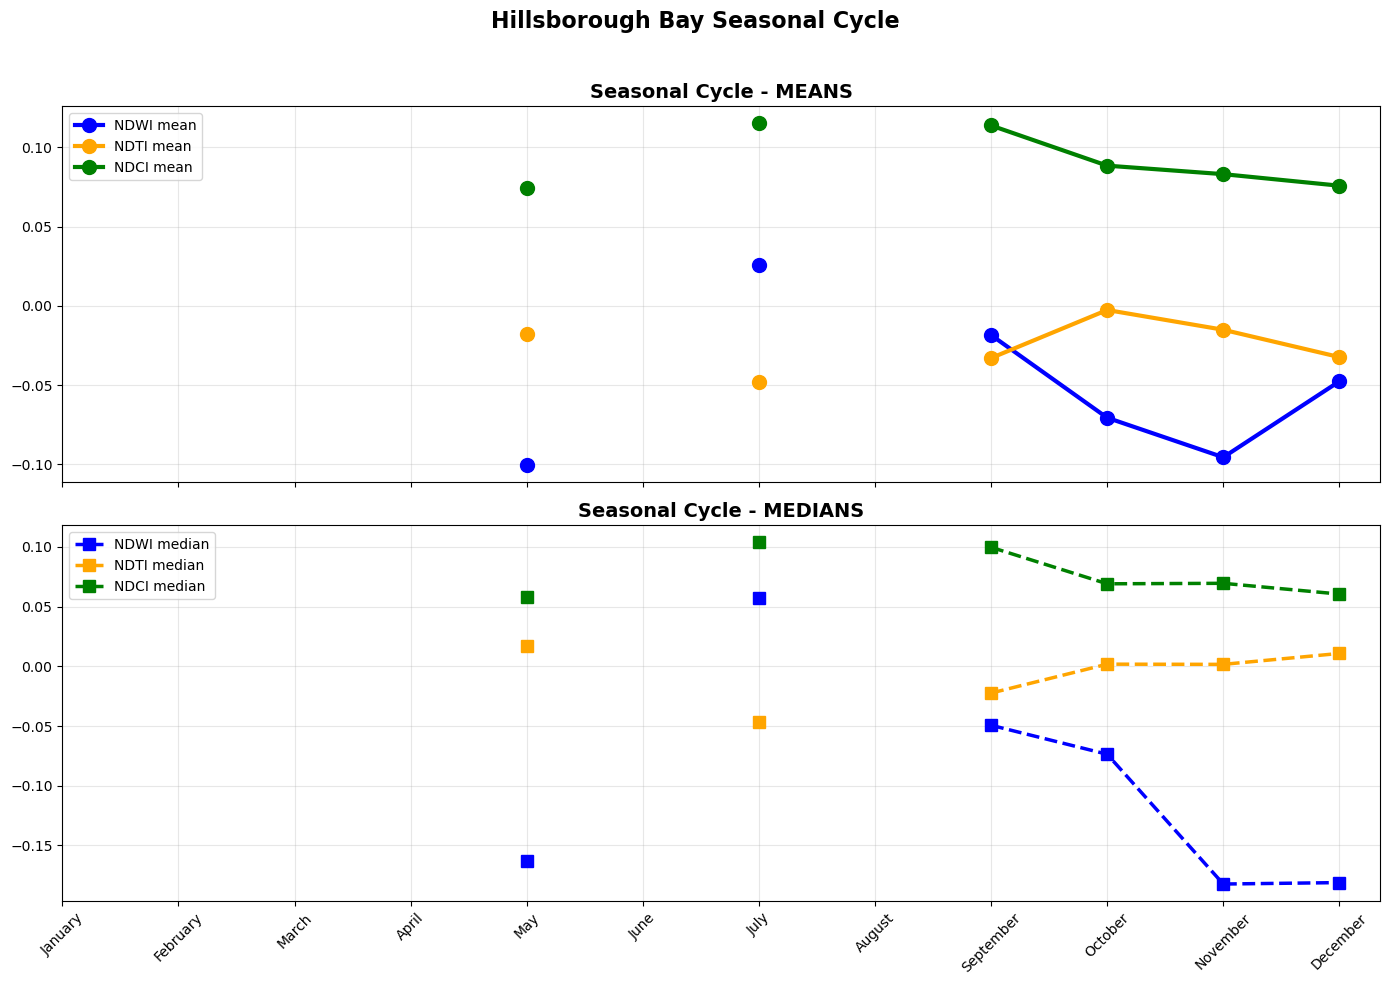

In [13]:
# Then call your plotting function with this reindexed dataframe
plot_wqi_seasonal(monthly_full_12, title="Hillsborough Bay Seasonal Cycle")

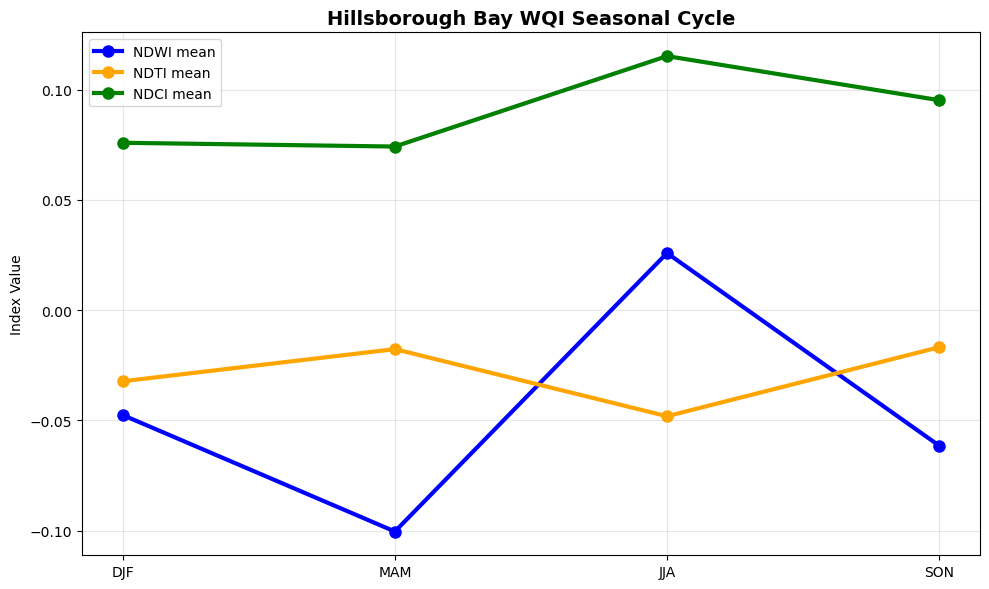

In [16]:
monthly_full_12.index = pd.to_datetime(monthly_full_12.index, format='%B')
plot_wqi_seasons(monthly_full_12, title="Hillsborough Bay WQI Seasonal Cycle")

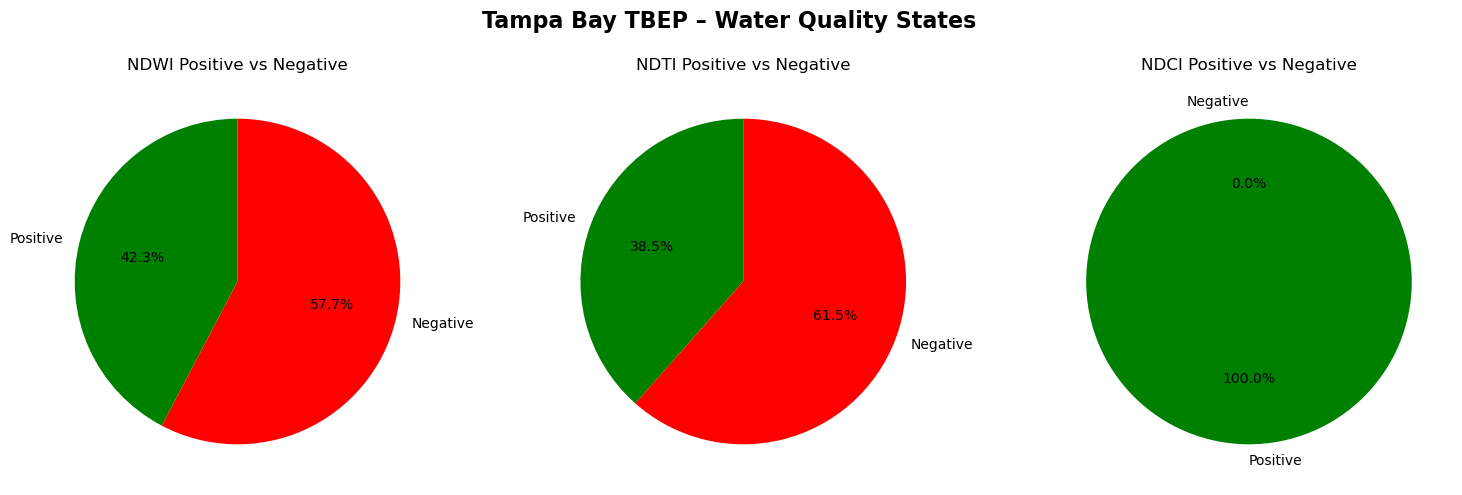

In [17]:
plot_wqi_pie_charts(df_full, title="Tampa Bay TBEP – Water Quality States")

In [12]:
# Save your EXISTING DataFrames (no recomputation needed)
df_full.to_csv("HB_BAY_results.csv", index=True)
df_roll_full.to_csv("HB_BAY_rolling.csv", index=True)
monthly_full.to_csv("HB_BAY_monthly.csv", index=True)

print("Files saved using existing data!")
print(f" - HB_BAY_results.csv: {df_full.shape}")
print(f" - HB_BAY_rolling.csv: {df_roll_full.shape}")
print(f" - HB_BAY_monthly.csv: {monthly_full.shape}")


Files saved using existing data!
 - HB_BAY_results.csv: (26, 7)
 - HB_BAY_rolling.csv: (26, 6)
 - HB_BAY_monthly.csv: (6, 6)


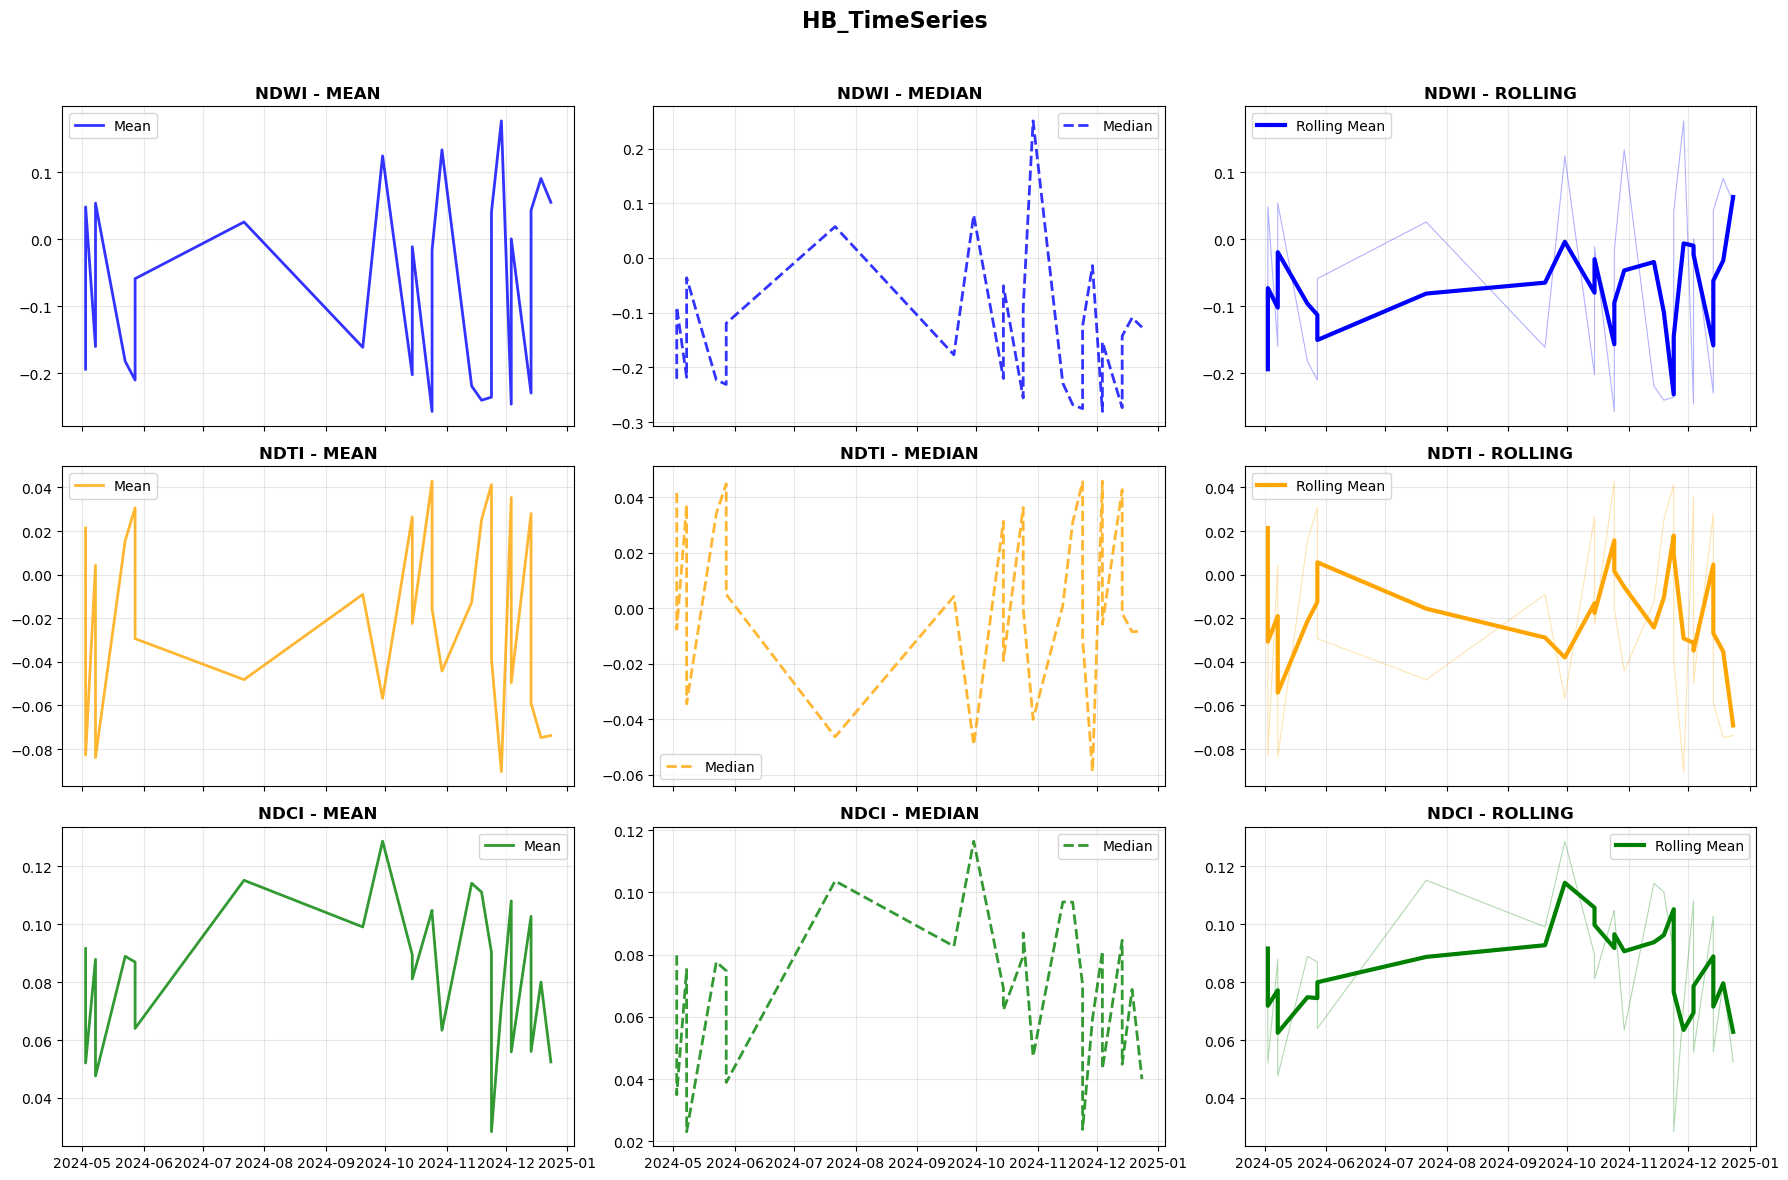

In [17]:
plot_wqi_time_series(df_full, df_roll_full, title="HB_TimeSeries")

In [ ]:
# Fix monthly plot ordering (matches your actual index)
month_order = ['May', 'July', 'September', 'October', 'November', 'December']
monthly_plot_ready = monthly_full.loc[month_order]

# Now plot with perfect connections
plot_wqi_seasonal(monthly_plot_ready, title="HB Monthly Cycle")


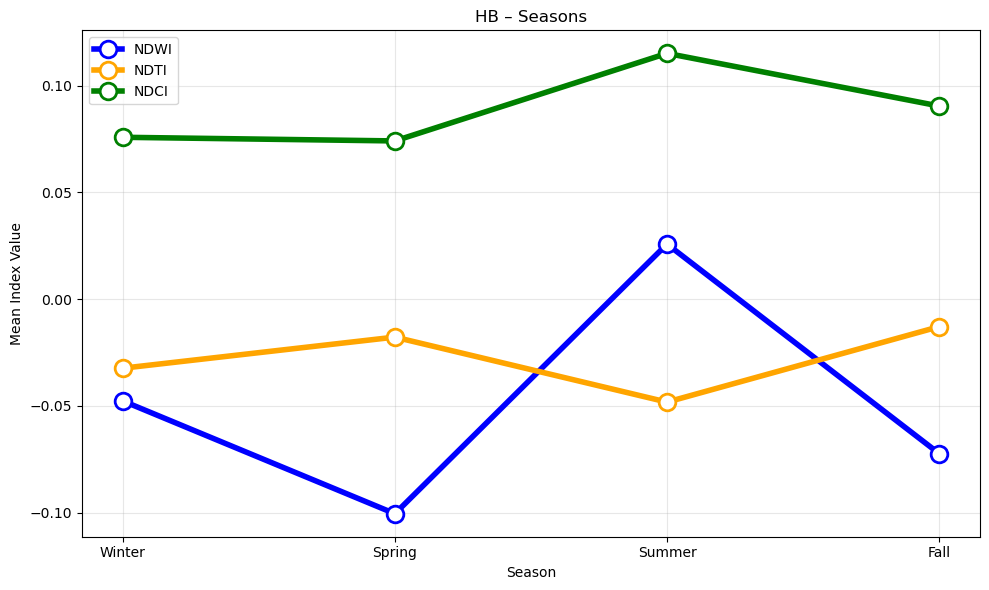

/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


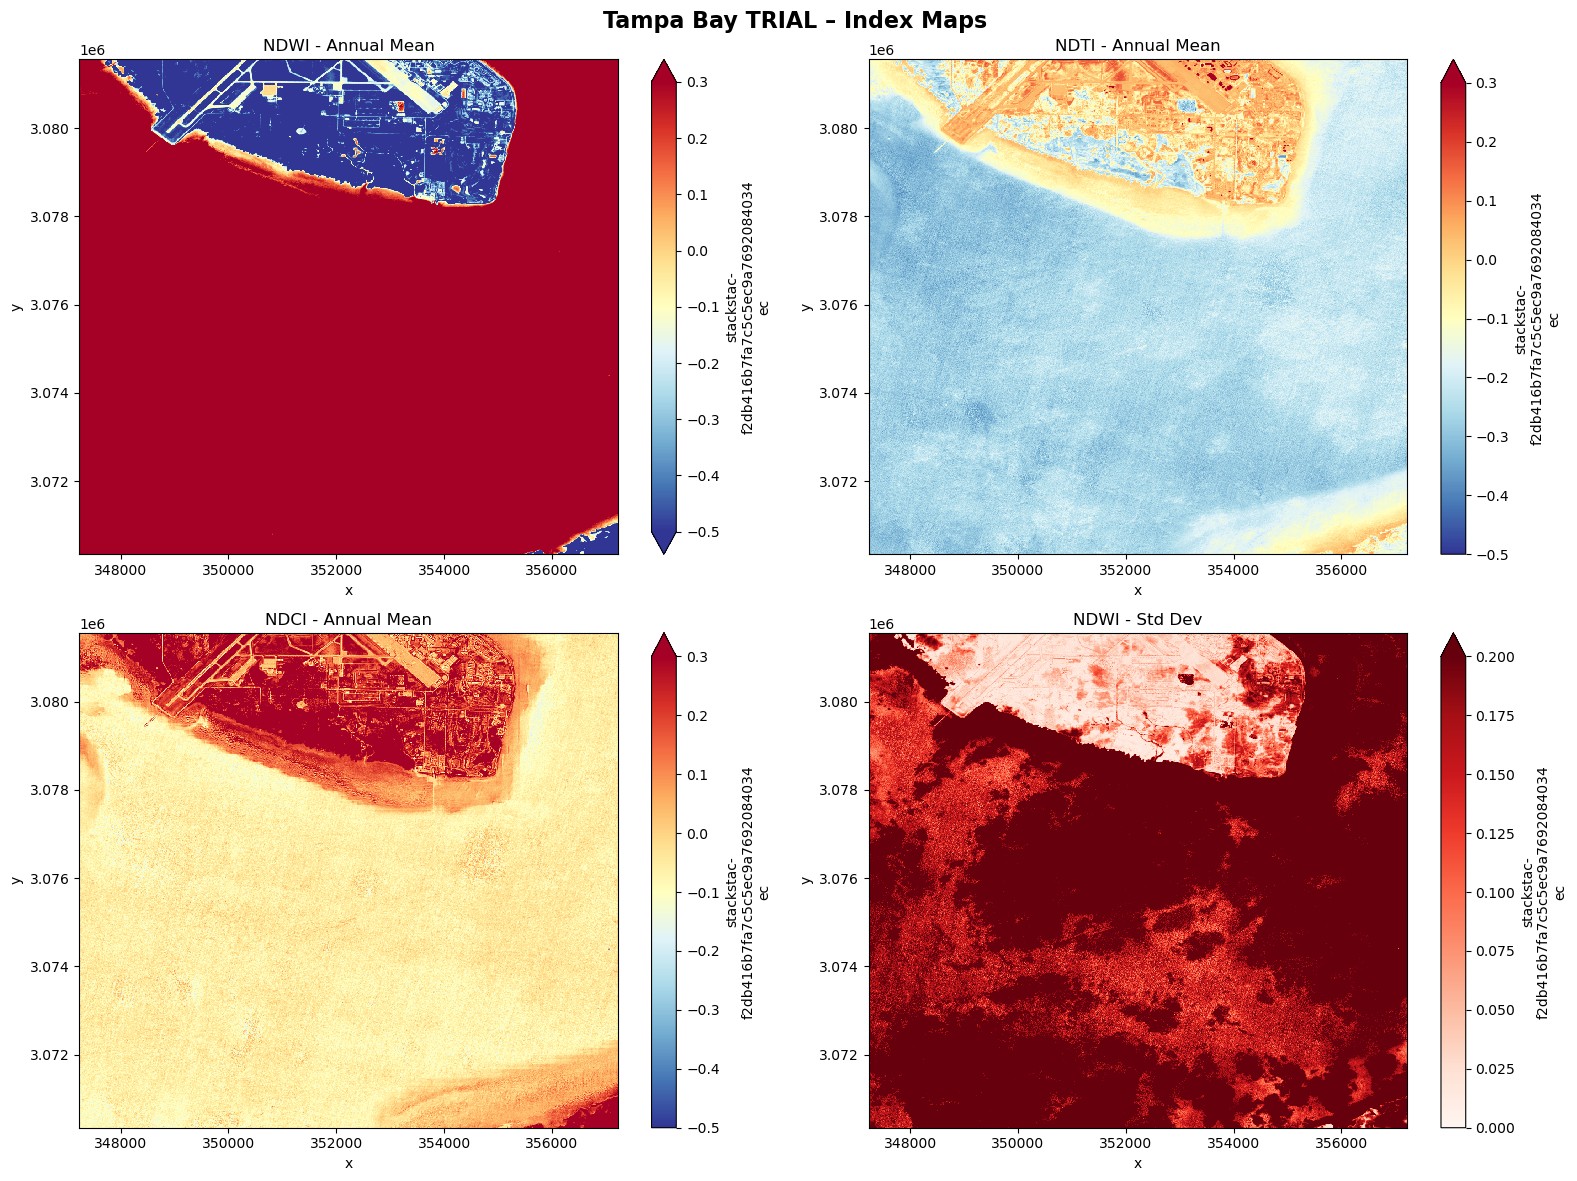

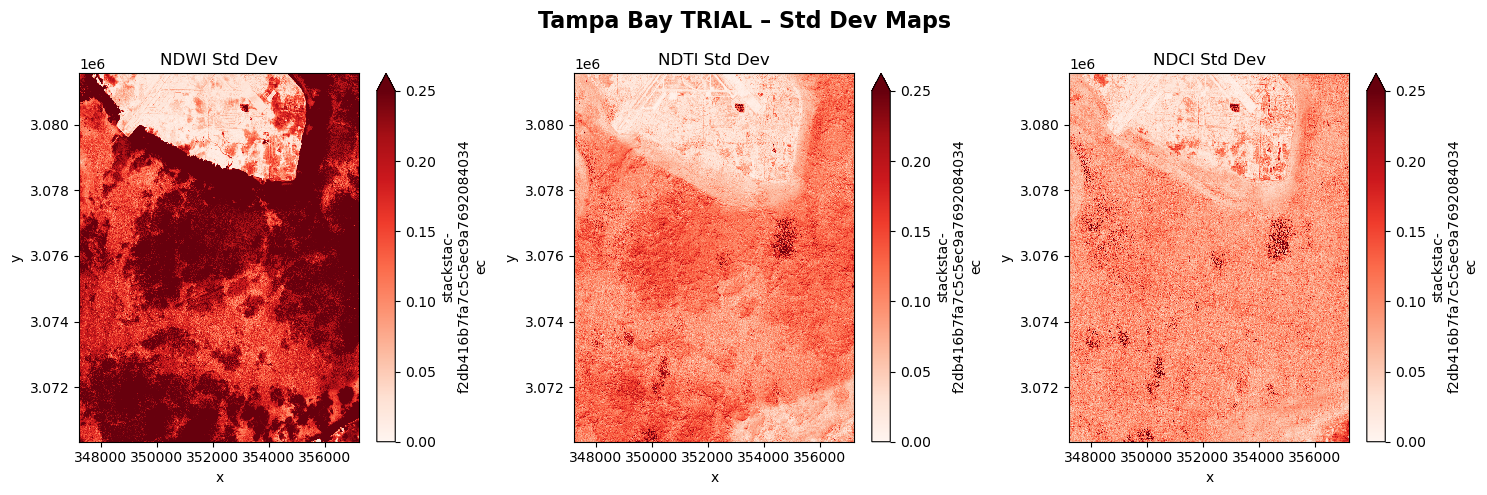

In [3]:
TBEP_TRIAL_BBOX = (-82.55, 27.75, -82.45, 27.85)
#TBEP_BBOX = (-82.8, 27.5, -82.2, 28.1)

# Reload CSVs
df_full = pd.read_csv('tampa_bay_wqi_full.csv', parse_dates=['date'], index_col='date')
df_roll_full = pd.read_csv('tampa_bay_wqi_rolling.csv', parse_dates=['date'], index_col='date')
monthly_full = pd.read_csv('tampa_bay_wqi_monthly.csv', index_col='month')

# Rebuild a small stack if needed (trial bbox to avoid 30‑min rerun)
from WQI_utils import compute_wqi_indices
df_trial, df_roll_trial, monthly_trial, stack = compute_wqi_indices(
    bbox=TBEP_TRIAL_BBOX,
    start_date="2024-08-01",
    end_date="2024-12-31",
    max_items=10,
    filter_clouds=True
)

from spatial_utils import plot_wqi_index_maps, plot_wqi_std_maps

plot_wqi_index_maps(stack, title="Tampa Bay TRIAL – Index Maps")
plot_wqi_std_maps(stack, title="Tampa Bay TRIAL – Std Dev Maps")


2025-12-13 00:37:47,084 - distributed.worker.memory - WARNING - Worker is at 81% memory usage. Pausing worker.  Process memory: 4.58 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 00:37:47,529 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 5.29 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 00:37:48,112 - distributed.nanny - WARNING - Restarting worker
2025-12-13 00:38:12,231 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 3.81 GiB -- Worker memory limit: 5.59 GiB
2025-12-13 00:38:12,982 - distributed.worker.memor

KilledWorker: Attempted to run task ('moment_combine-partial-1aeba6d9681ac6ac7d631e219505c730', 31, 0, 0) on 4 different workers, but all those workers died while running it. The last worker that attempt to run the task was tcp://127.0.0.1:38087. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

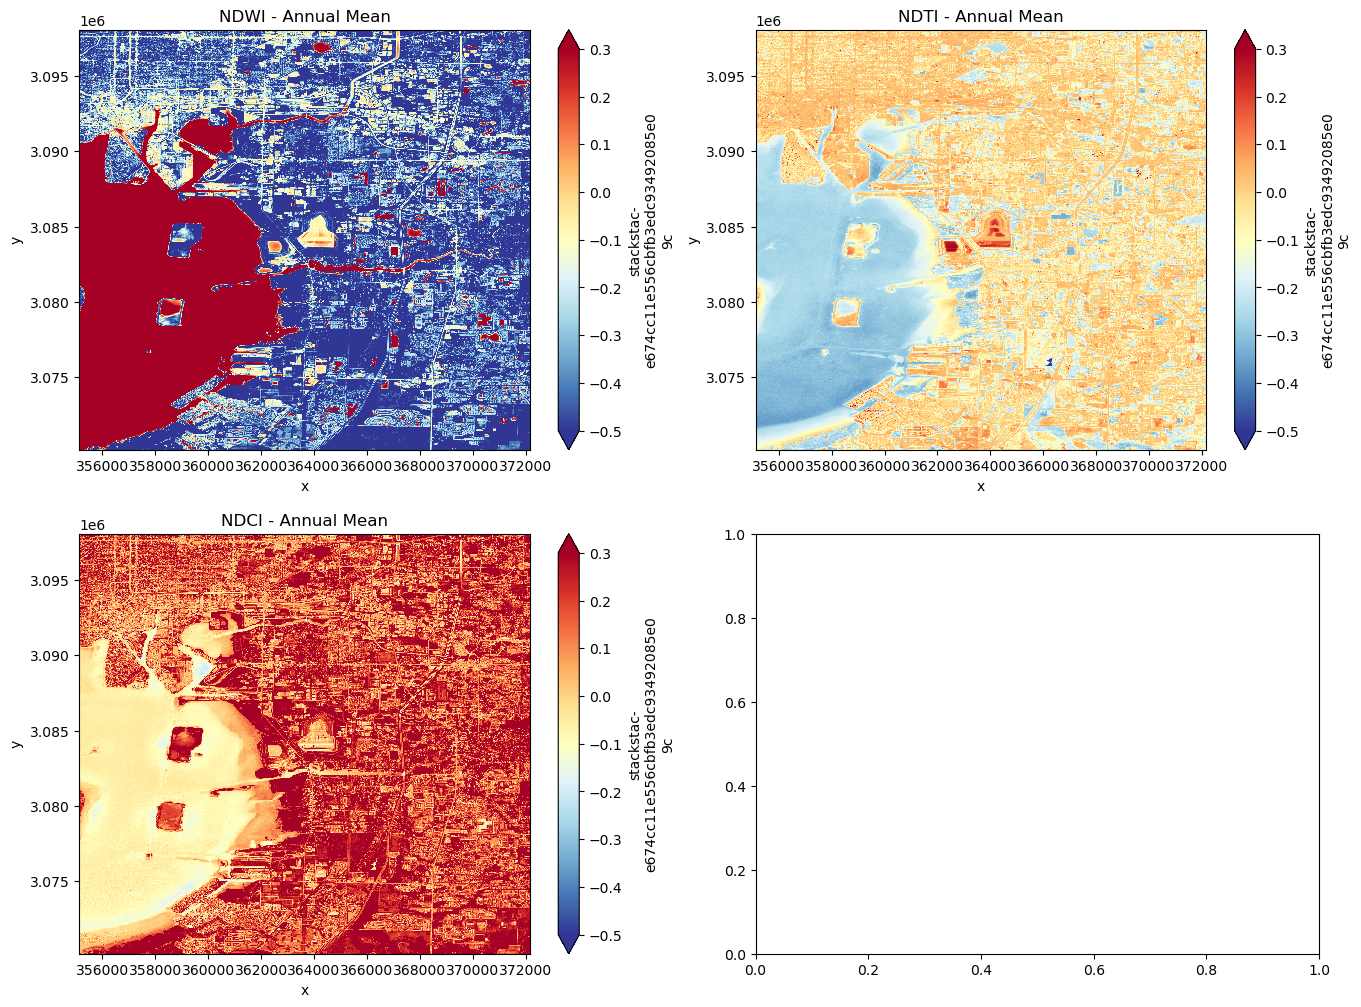

In [23]:
from spatial_utils import plot_wqi_index_maps, plot_wqi_std_maps

plot_wqi_index_maps(stack, title="HB – Index Maps")
plot_wqi_std_maps(stack, title="HB TRIAL – Std Dev Maps")

KeyError: "not all values found in index 'band'. Try setting the `method` keyword argument (example: method='nearest')."

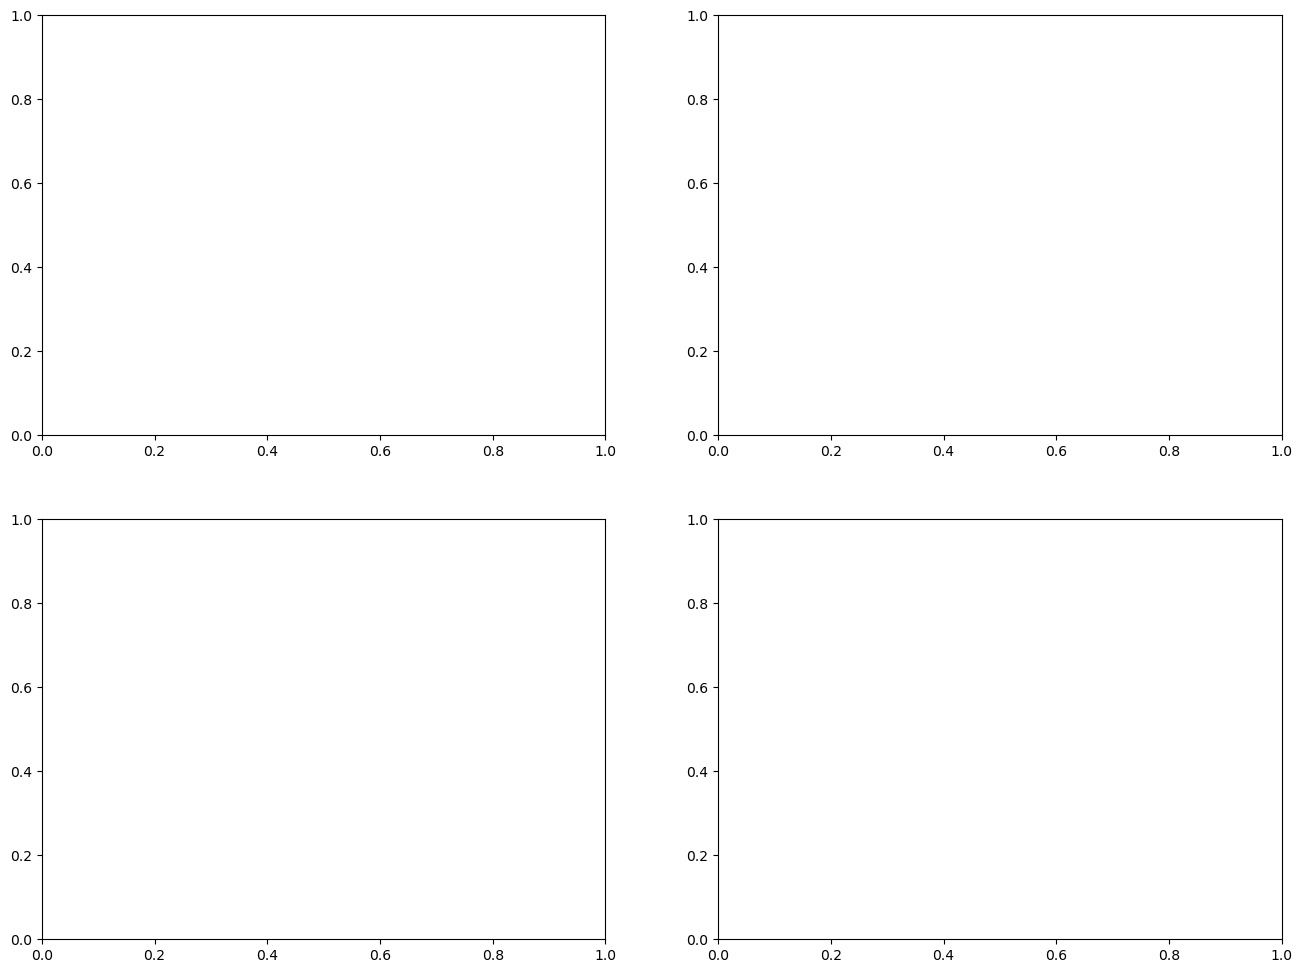

In [10]:
# Cell 1: Index maps (NDWI, NDTI, NDCI means)
plot_wqi_index_maps(stack, title="Tampa Bay TBEP – Index Maps (100 scenes)")

# Cell 2: Standard deviation maps (spatial variability)
plot_wqi_std_maps(stack, title="Tampa Bay TBEP – Std Dev Maps (100 scenes)")

In [ ]:
# Test with raw bands (works immediately)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

bands = ['green', 'red', 'nir']
band_names = ['Green', 'Red', 'NIR']

for i, (band, name) in enumerate(zip(bands, band_names)):
    stack.sel(band=band).mean('time').plot(ax=axes[i], cmap='RdYlGn', vmin=0, vmax=0.3)
    axes[i].set_title(f'{name} Band - Mean')

plt.suptitle('Tampa Bay Spectral Bands - Annual Means', fontsize=16)
plt.tight_layout()
plt.show()


2025-12-12 16:38:17,543 - distributed.worker.memory - WARNING - Worker is at 83% memory usage. Pausing worker.  Process memory: 4.66 GiB -- Worker memory limit: 5.59 GiB
2025-12-12 16:38:18,799 - distributed.worker.memory - WARNING - Worker is at 66% memory usage. Resuming worker. Process memory: 3.73 GiB -- Worker memory limit: 5.59 GiB


In [8]:
df_full, df_roll_full, monthly_full = compute_wqi_indices(
    bbox=TBEP_BBOX,
    start_date=start_date,
    end_date=end_date,
    max_items=100,           # or whatever value you decided from Step 1
    filter_clouds=True
)
print("Full TBEP results shape:", df_full.shape)
print(df_results.head())

/opt/conda/envs/geog313-final-project/lib/python3.11/site-packages/stackstac/prepare.py:408: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  times = pd.to_datetime(


Full TBEP results shape: (100, 7)


NameError: name 'df_results' is not defined

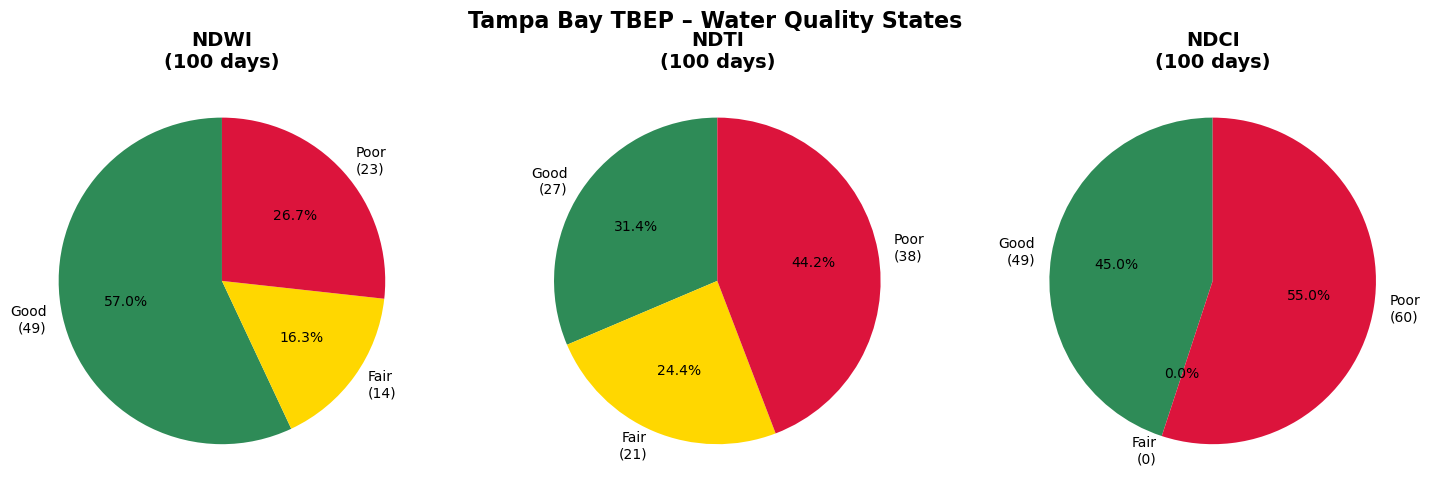

In [7]:
# New pie chart cell
plot_wqi_pie_charts(df_full, title="Tampa Bay TBEP – Water Quality States")

In [8]:
# Maps (new)
plot_wqi_index_maps(stack, title="Tampa Bay Index Maps")
plot_wqi_std_maps(stack, title="Tampa Bay Std Dev Maps")

NameError: name 'stack' is not defined

In [17]:
# 1. MAIN DATA (for time series + PCA input)
df_full.to_csv('tampa_bay_wqi_full.csv', index_label='date')
print("✓ Saved: tampa_bay_wqi_full.csv (100 rows × 7 cols)")

# 2. ROLLING MEANS (smoothed trends for correlations)
df_roll_full.to_csv('tampa_bay_wqi_rolling.csv', index_label='date')
print("✓ Saved: tampa_bay_wqi_rolling.csv (smoothed data)")

# 3. MONTHLY AVERAGES (seasonal patterns)
monthly_full.to_csv('tampa_bay_wqi_monthly.csv', index_label='month')
print("✓ Saved: tampa_bay_wqi_monthly.csv (seasonal summary)")


✓ Saved: tampa_bay_wqi_full.csv (100 rows × 7 cols)
✓ Saved: tampa_bay_wqi_rolling.csv (smoothed data)
✓ Saved: tampa_bay_wqi_monthly.csv (seasonal summary)


In [18]:
import os
print("Files exist:")
for f in ['tampa_bay_wqi_full.csv', 'tampa_bay_wqi_rolling.csv', 'tampa_bay_wqi_monthly.csv']:
    print(f"  {f}: {os.path.exists(f)} ({os.path.getsize(f)/1024:.1f} KB)")


Files exist:
  tampa_bay_wqi_full.csv: True (13.9 KB)
  tampa_bay_wqi_rolling.csv: True (15.1 KB)
  tampa_bay_wqi_monthly.csv: True (0.7 KB)


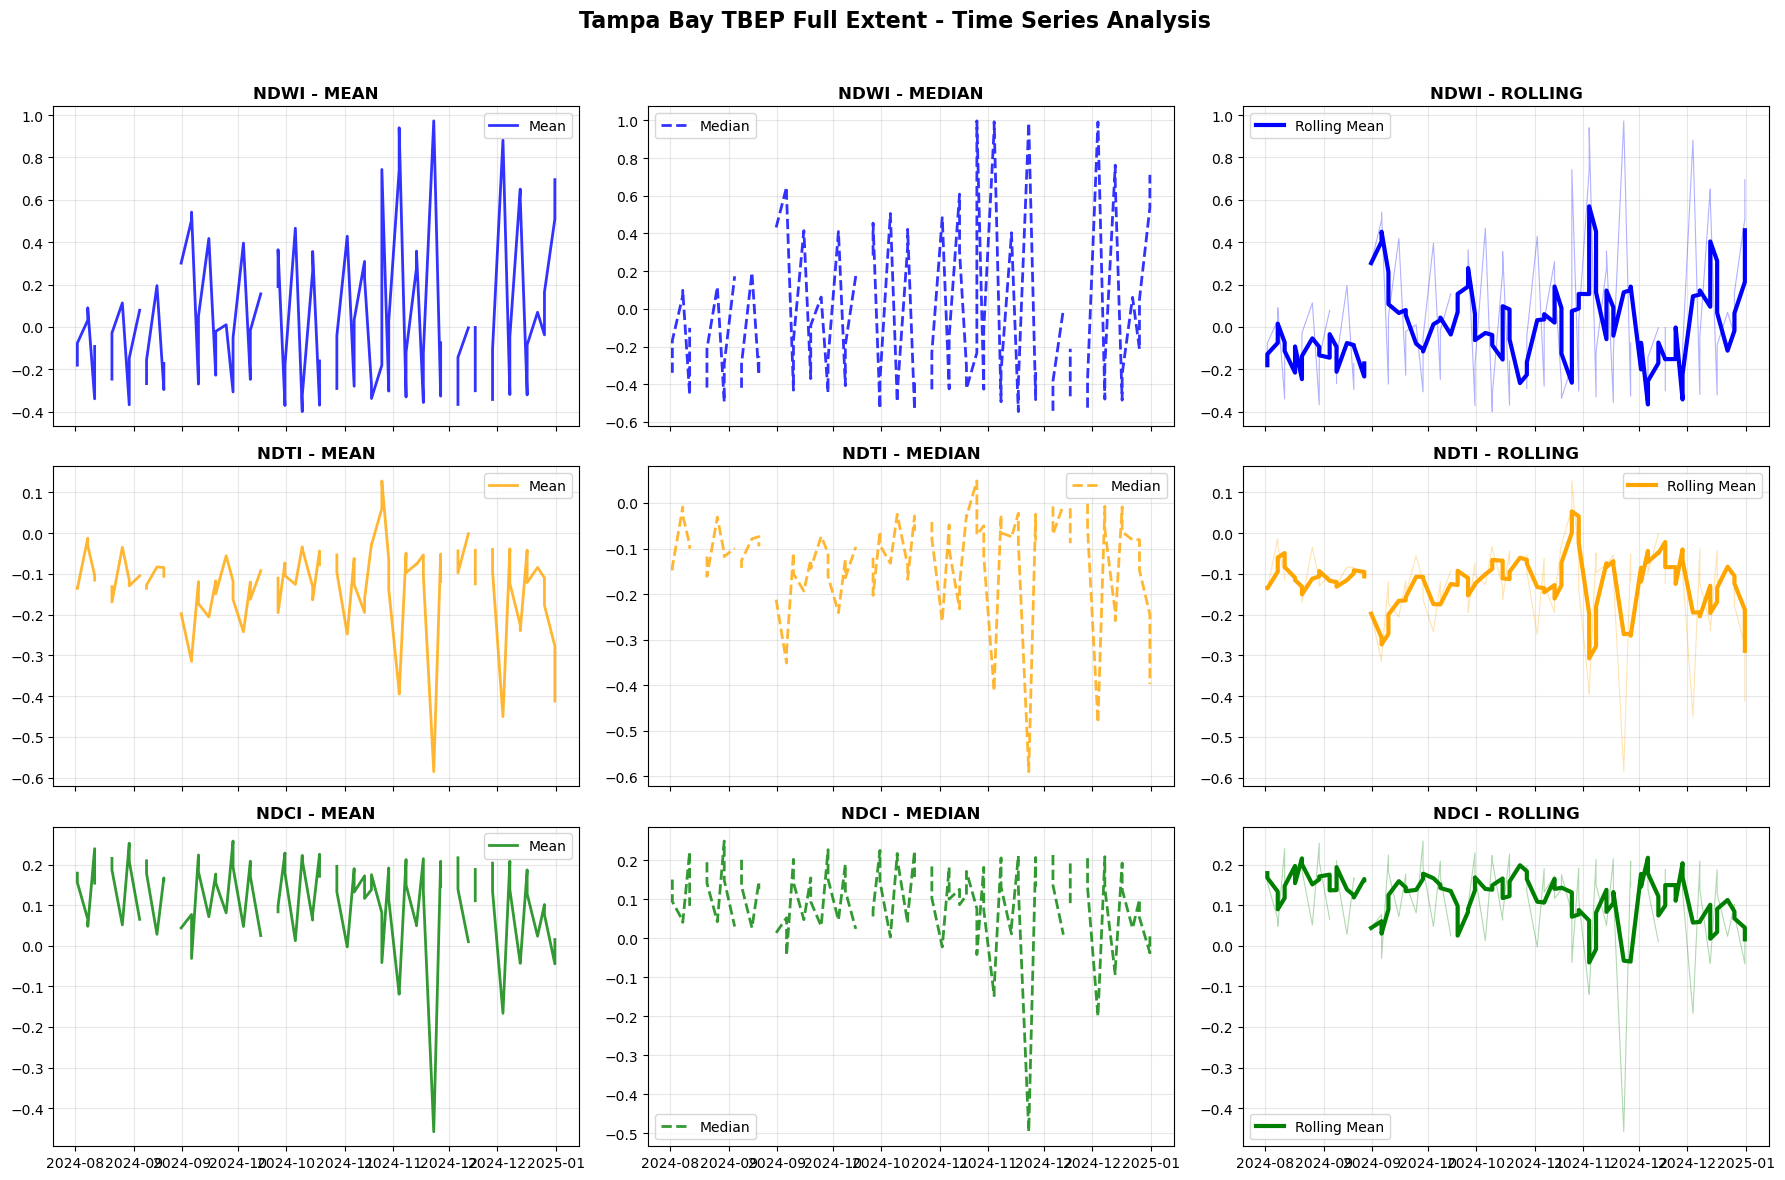

In [22]:
plot_wqi_time_series(
    df_full, 
    df_rolling=df_roll_full, 
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay TBEP Full Extent - Time Series Analysis",
    show_anomalies=False  # Set True if you have anomaly columns
)

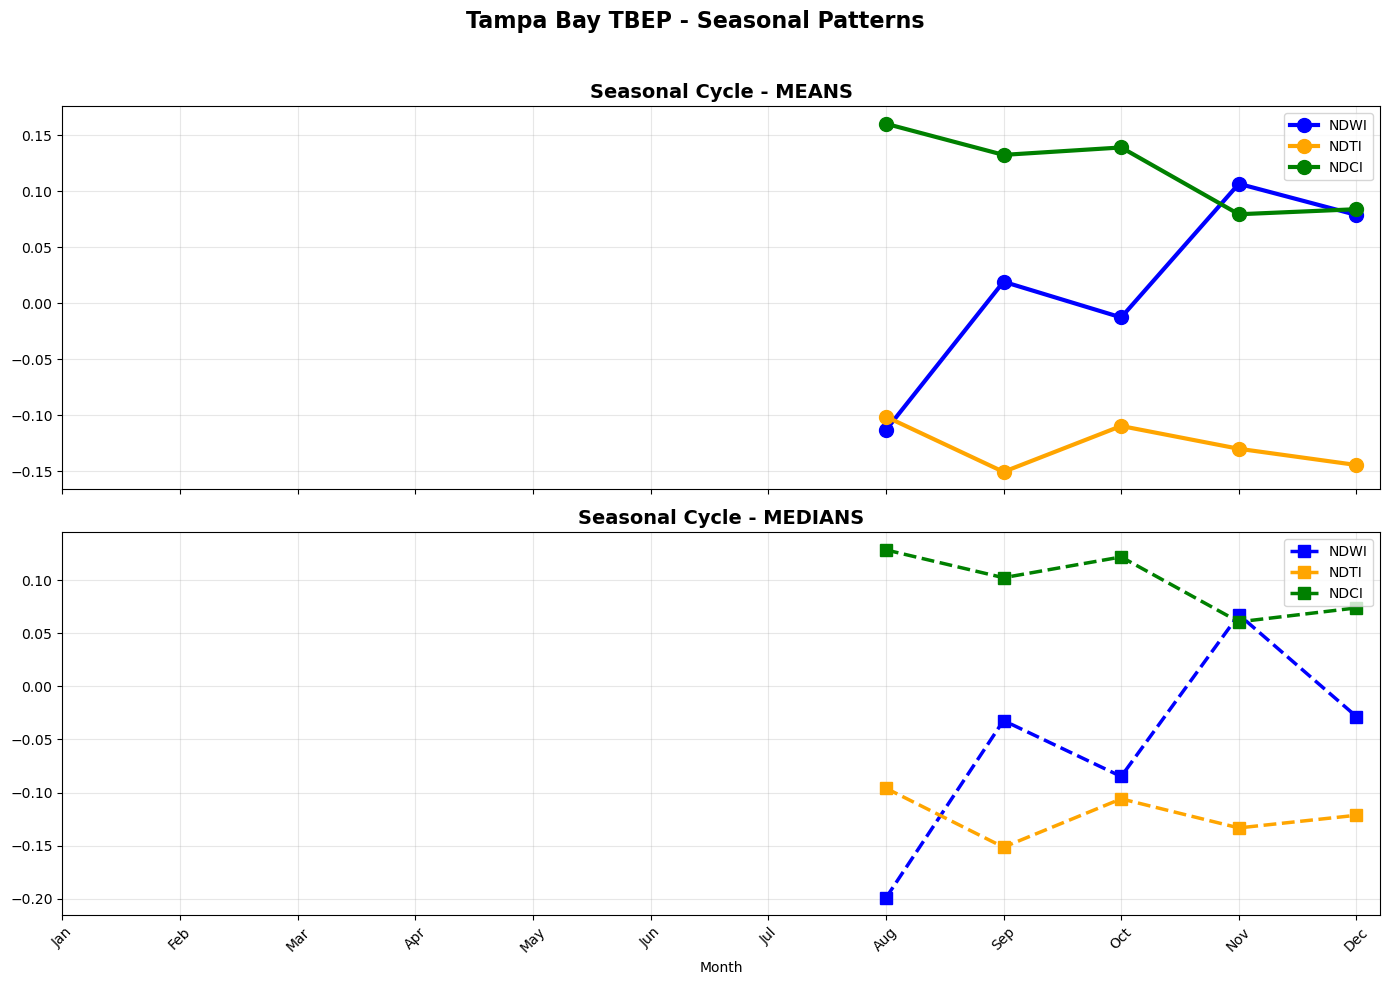

In [16]:
plot_wqi_seasonal(
    monthly_full,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay TBEP - Seasonal Patterns"
)


In [23]:
# 3. Seasonal groups (Winter/Spring/Summer/Fall)
plot_wqi_seasons(
    df_results=df_full,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay TBEP – Seasonal Cycle"
)

NameError: name 'plot_wqi_seasons' is not defined

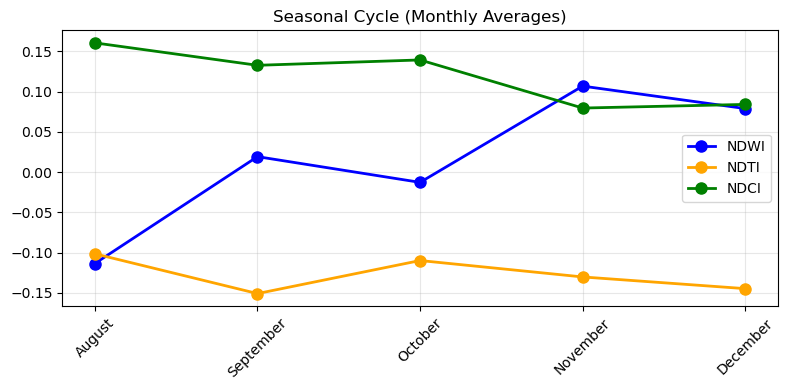

In [11]:
import matplotlib.pyplot as plt

# Use the index of monthly_full (already month names)
months_available = monthly_full.index.tolist()
x_pos = range(len(months_available))  # here: 0..4

fig, ax2 = plt.subplots(figsize=(8, 4))

for idx, color in zip(['ndwi', 'ndti', 'ndci'], ['blue', 'orange', 'green']):
    ax2.plot(
        x_pos,
        monthly_full[f'{idx}_mean'],
        'o-',
        color=color,
        linewidth=2,
        markersize=8,
        label=f'{idx.upper()}'
    )

ax2.set_xticks(x_pos)
ax2.set_xticklabels(months_available, rotation=45)
ax2.set_title('Seasonal Cycle (Monthly Averages)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


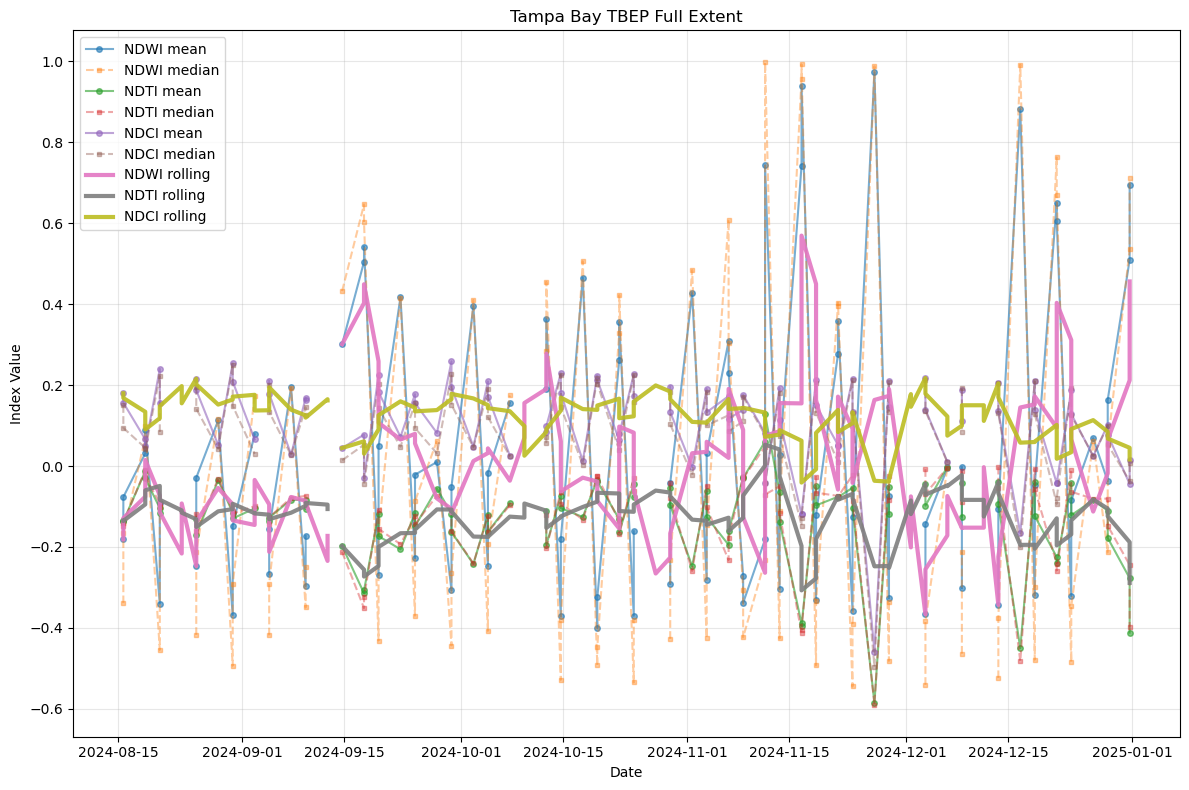

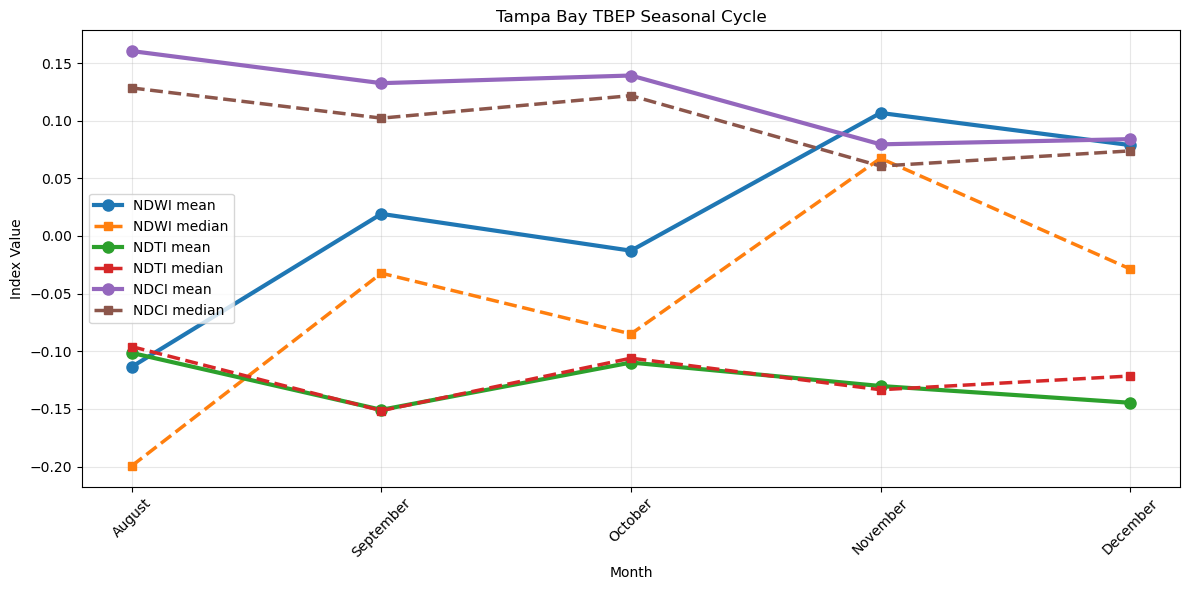

In [12]:
plot_wqi_time_series(
    df_full,
    df_rolling=df_roll_full,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay TBEP Full Extent"
)

plot_wqi_seasonal(
    monthly_full,          # if you saved/recomputed this; otherwise recompute from df_full
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay TBEP Seasonal Cycle"
)

In [22]:
df_full.shape
df_full.head()
df_full.index.is_monotonic_increasing

True

In [17]:
df_full = pd.read_csv(
    "outputs/tampa_tbep_full_40.csv",
    index_col="date",
    parse_dates=True
)

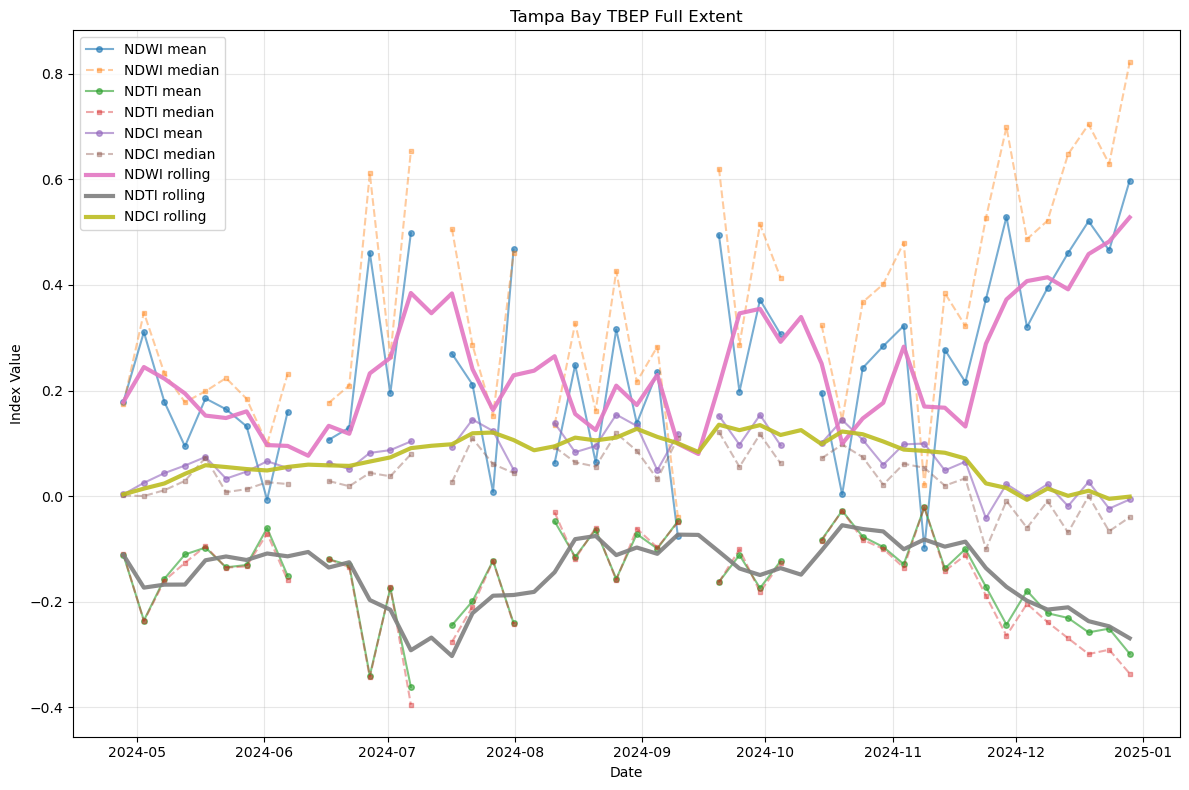

In [23]:
df_roll_full = df_full.rolling(window=3, min_periods=1).mean()
df_roll_full.head()          # should print quickly
plot_wqi_time_series(df_full, df_roll_full,
                     indices=["ndwi", "ndti", "ndci"],
                     title="Tampa Bay TBEP Full Extent")

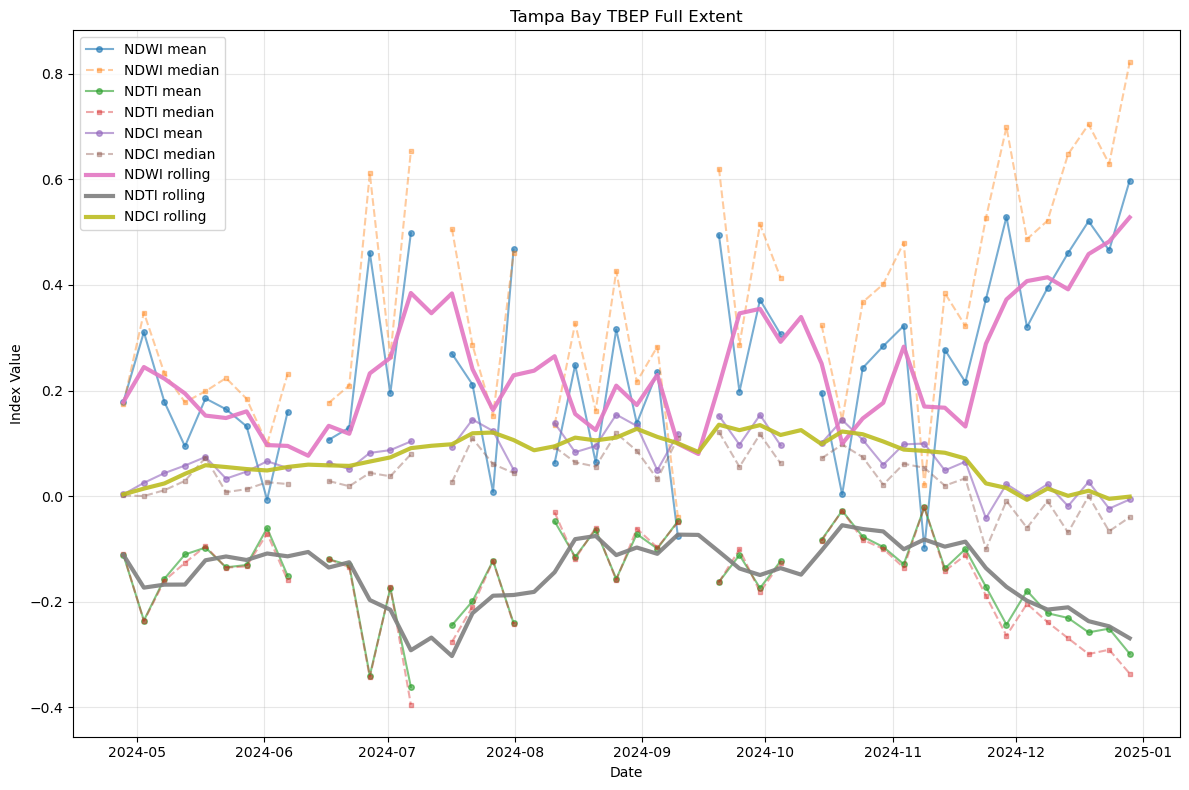

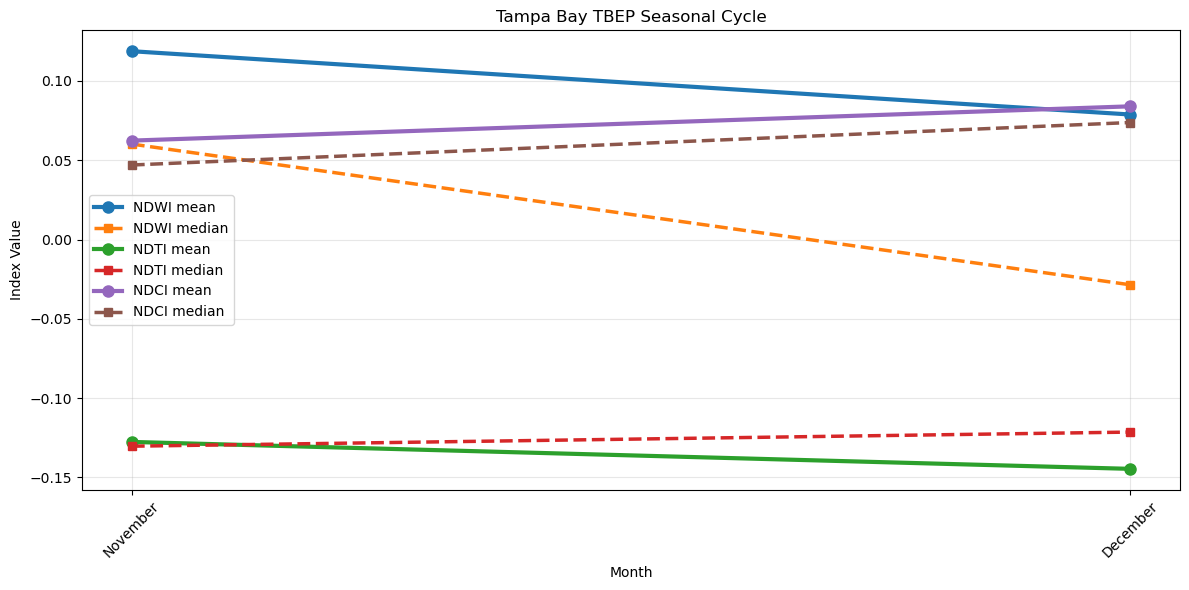

In [24]:
plot_wqi_time_series(
    df_full,
    df_rolling=df_roll_full,
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay TBEP Full Extent"
)

plot_wqi_seasonal(
    monthly_full,          # if you saved/recomputed this; otherwise recompute from df_full
    indices=["ndwi", "ndti", "ndci"],
    title="Tampa Bay TBEP Seasonal Cycle"
)